In [5]:
# Import points and packages
import sys
sys.path.append('../')
from Functions import * 
import copy
%store -r points
num_samples = 4 

In [6]:
# Matrix Y, containing all relations
Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

In [7]:
# The code compute the latent space for the LDM with a prior
alpha = 5 # Change alpha here
prev_grad = 200 
grad = 0
k = 0
n = 100000
grad_sum = np.zeros(n)
points_copy_prior = copy.deepcopy(points)

while abs(prev_grad - grad) > 0.01: # stopping criteria
    prev_grad = grad
    for i in range(1,num_samples+1):
        grad_sum[k] += np.sum(Gradient_function_prior_fast(i,2,Y,points_copy_prior,alpha)**2)
        points_copy_prior[i] += LR(k)*Gradient_function_prior_fast(i,2,Y,points_copy_prior,alpha)
    grad = grad_sum[k]
    k += 1


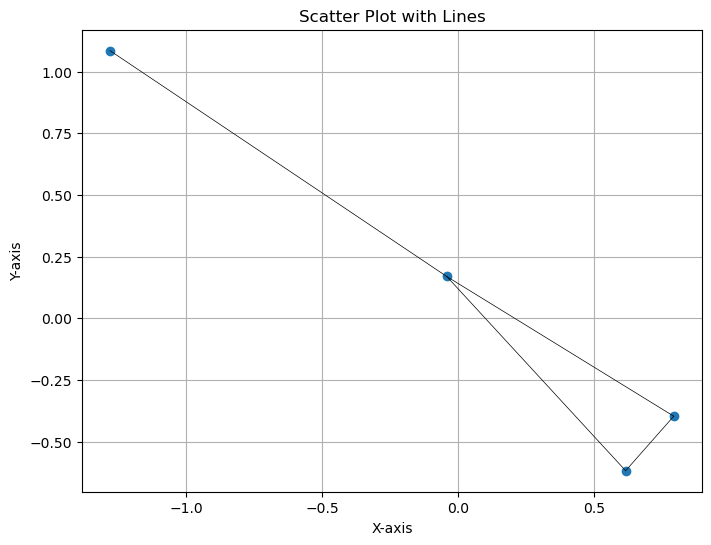

In [8]:
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points_copy_prior[Y[m][1]]
        point2 = points_copy_prior[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.5) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points_copy_prior.values()]
y = [point[1] for point in points_copy_prior.values()]
plt.scatter(x, y)#, color=['red', 'green', 'blue', 'purple'])

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Lines')
plt.grid(True)
plt.show()